___
# Atividade: Teoria da Probabilidade
___

## Aula 07

**Referência de Leitura:**
1. Magalhães e Lima (7ª. Edição): pág. 49 a 68 - Probabilidades

**Hoje:**
1. Conceito de Probabilidade
1. Probabilidade Condicional
1. Independência de eventos

**Próxima aula:**
1. Magalhães e Lima (7ª. Edição): pág. 58 a 60 - Teorema de Bayes

**Exercícios:**
1. Exercícios do Powerpoint
1. Magalhães e Lima (7ª. Edição): pág. 52 e 53

___

In [13]:
%%capture

#Instalando o matplotlib_venn para plotar Diagrama de Venn
!pip install matplotlib_venn

In [14]:
%matplotlib inline
%reset -f

from matplotlib import pyplot as plt
import numpy as np
from itertools import product
from matplotlib_venn import venn2, venn2_circles

#ATENÇÃO: Não foquem muito na formatação do print() e sim na mensagem de saída

In [15]:
#Definindo a função de probabilidade para 1 dado de 6 faces:

#Número de faces do dado
n = 6
#Espaço amostral do dado: todas as possibilidades
Ω = set(range(1, n+1))
print("Ω: {0}".format(Ω))

#Função que calcula e retorna a probabilidade.
def P(evento, espaco=Ω):
    return "{0}/{1} ou {2:.2f}%".format(len(evento & espaco), len(espaco),len(evento)*100/len(espaco))

Ω: {1, 2, 3, 4, 5, 6}


In [16]:
#Qual a probabilidade de sair o número 6? P(A) = 1/6
A = {6}
res = P(A)

print("P(A) = P({{1}}) = {0}".format(res))

P(A) = P({1}) = 1/6 ou 16.67%


In [17]:
#Propriedades da função Probabilidade:

#Probabilidade do espaço e do conjunto vazio
res = P(Ω)

print("P(Ω) = {0}".format(res))

# {} é equivalente a ∅
res = P(set([]))

print("P(∅) = {0}".format(res))

P(Ω) = 6/6 ou 100.00%
P(∅) = 0/6 ou 0.00%


P(Aᶜ) = P(Ω - A) = 1 - P(A) = 5/6 ou 83.33%


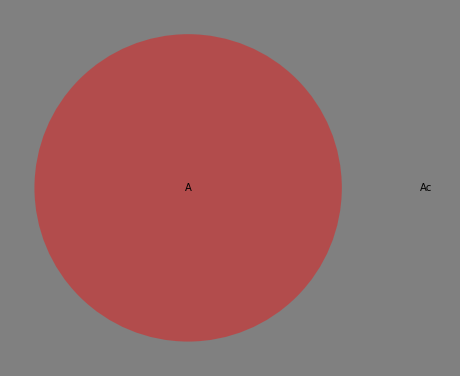

In [18]:
#Complemento: qual a probabilidade de NÃO sair o número 1?
#P(Aᶜ) = P(Ω - A) = 1 - P(A)
Ac = Ω - A 
res = P(Ac)

fig = plt.figure(figsize=(8,8))
v = venn2(subsets=(1,0,0), set_labels = ('', ''))
v.get_label_by_id('100').set_text('A')
v.get_label_by_id('010').set_text('Ac')
fig.patch.set_facecolor((0.5, 0.5, 0.5))

print("P(Aᶜ) = P(Ω - A) = 1 - P(A) = {0}".format(res))

In [19]:
#UNIÃO de eventos: probabilidade dos impares
B = {1} | {2} | {3}
res = P(B)

print("P(B) = P({{1}} ∪ {{3}} ∪ {{5}}) = P({{1, 3, 5}}) = {0}".format(res))

P(B) = P({1} ∪ {3} ∪ {5}) = P({1, 3, 5}) = 3/6 ou 50.00%


In [20]:
#Agora vamos considerar 2 jogadas seguidas ou dois dados

#Novo Espaço amostral
Ω = set(product(range(1,n+1),range(1,n+1)))
#Vamos olhar o novo espaço amostral
print("Ω: {0}\n".format(sorted(Ω)))

#Tamanho: n²
print("len(Ω) = n² = {0}".format(len(Ω)))

#Redefinindo a função que calcula e retorna a probabilidade.
def P(evento, espaco=Ω):
    return (len(evento)*100/len(espaco), 
            "{0}/{1} ou {2:.2f}%".format(len(evento & espaco), len(espaco),len(evento)*100/len(espaco))
           )

Ω: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]

len(Ω) = n² = 36


In [21]:
#Probabilidade da soma das jogadas ser par:

#Função que retorna True se for par
def CheckEven(e):
    return (e[0] + e[1]) % 2 == 0

#A soma dos elementos ser par
A = set(list(filter(CheckEven, Ω)))

print("A: A soma dos elementos ser par: {0}".format(sorted(A)))
PA = P(A)
print("P(A) = {0}\n".format(PA[1]))


A: A soma dos elementos ser par: [(1, 1), (1, 3), (1, 5), (2, 2), (2, 4), (2, 6), (3, 1), (3, 3), (3, 5), (4, 2), (4, 4), (4, 6), (5, 1), (5, 3), (5, 5), (6, 2), (6, 4), (6, 6)]
P(A) = 18/36 ou 50.00%



In [22]:
#Probabilidade da soma das jogadas ser ≤ 6:

#Função que retorna True se for <= 6
def CheckLET6(e):
    return (e[0] + e[1]) <= 6

#A soma dos elementos ser ≤ 6
B = set(list(filter(CheckLET6, Ω)))

print("B: A soma dos elementos ser ≤ 6: {0}".format(sorted(B)))
PB = P(B)
print("P(B) = {0}\n".format(PB[1]))

B: A soma dos elementos ser ≤ 6: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (4, 1), (4, 2), (5, 1)]
P(B) = 15/36 ou 41.67%



In [23]:
#UNIÃO: Soma ser par OU menor igual a 6
C = A | B

print("C: A soma dos elementos ser par OU ≤ 6: {0}".format(sorted(C)))
PC = P(C)
print("P(C) = P(A ∪ B) = {0}\n".format(PC[1]))


C: A soma dos elementos ser par OU ≤ 6: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 1), (2, 2), (2, 3), (2, 4), (2, 6), (3, 1), (3, 2), (3, 3), (3, 5), (4, 1), (4, 2), (4, 4), (4, 6), (5, 1), (5, 3), (5, 5), (6, 2), (6, 4), (6, 6)]
P(C) = P(A ∪ B) = 24/36 ou 66.67%



In [24]:
#INTERSECÇÃO: Soma ser par E menor igual a 6
D = A & B

print("D: A soma dos elementos ser par AND ≤ 6: {0}".format(sorted(D)))
PD = P(D)
print("P(D) = P(A ∩ B) = {0}\n".format(PD[1]))


D: A soma dos elementos ser par AND ≤ 6: [(1, 1), (1, 3), (1, 5), (2, 2), (2, 4), (3, 1), (3, 3), (4, 2), (5, 1)]
P(D) = P(A ∩ B) = 9/36 ou 25.00%



Verificando que P(A ∪ B) = P(A) + P(B) - P(A ∩ B):
P(A ∪ B) = 66.67%


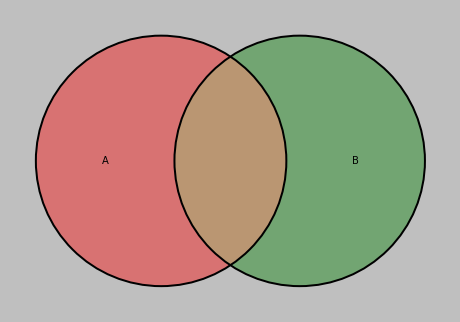

In [25]:
#Verificar que P(A ∪ B) = P(A) + P(B) - P(A ∩ B)

print("Verificando que P(A ∪ B) = P(A) + P(B) - P(A ∩ B):")
print("P(A ∪ B) = {0:.2f}%".format(PA[0]+PB[0]-PD[0]))

#Verificar se faz sentindo com o diagrama abaixo
fig = plt.figure(figsize=(8,8))
v = venn2(subsets=(2,2,1), set_labels = ('', '',''))
v.get_label_by_id('10').set_text('A')
v.get_label_by_id('01').set_text('B')
v.get_label_by_id('11').set_text('')
c = venn2_circles(subsets=(2, 2, 1))
fig.patch.set_facecolor((0.75, 0.75, 0.75))

In [26]:
#Regra de De Morgan

#P((A ∩ B)ᶜ) = P(Aᶜ ∪ Bᶜ)
#P((A ∪ B)ᶜ) = P(Aᶜ ∩ Bᶜ)

print("Regra de De Morgan: Verificando que P((A ∩ B)ᶜ) = P(Aᶜ ∪ Bᶜ):\n")

print("Lado esquerdo:")
print("P((A ∩ B)ᶜ)  = P(Dᶜ) = P(Ω - D) = {0:.2f}%\n".format(P(Ω - D)[0]))

print("Lado direito: usando a propriedade da união de eventos")
print("P(Aᶜ ∪ Bᶜ)  = P(Aᶜ) + P(Bᶜ) - P(Aᶜ ∩ Bᶜ) = P(Ω - A) + P(Ω - B) - P(Aᶜ ∩ Bᶜ)")

#Montando Aᶜ ∩ Bᶜ 
E = (Ω - A) & (Ω - B)

#Calculando Aᶜ ∪ Bᶜ
res = P(Ω - A)[0] + P(Ω - B)[0] - P(E)[0]

print("P(Aᶜ ∪ Bᶜ)  = {0:.2f}%\n".format(res))


Regra de De Morgan: Verificando que P((A ∩ B)ᶜ) = P(Aᶜ ∪ Bᶜ):

Lado esquerdo:
P((A ∩ B)ᶜ)  = P(Dᶜ) = P(Ω - D) = 75.00%

Lado direito: usando a propriedade da união de eventos
P(Aᶜ ∪ Bᶜ)  = P(Aᶜ) + P(Bᶜ) - P(Aᶜ ∩ Bᶜ) = P(Ω - A) + P(Ω - B) - P(Aᶜ ∩ Bᶜ)
P(Aᶜ ∪ Bᶜ)  = 75.00%



B: Jogadas cujo o primeiro elemento = 4: [(4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6)]
A ∩ B: Jogadas cuja soma dos elementos é ≤ 6 e o primeiro elemento = 4: [(4, 1), (4, 2)]

P(A|B) = P(A ∩ B)/P(B) = 33.33%



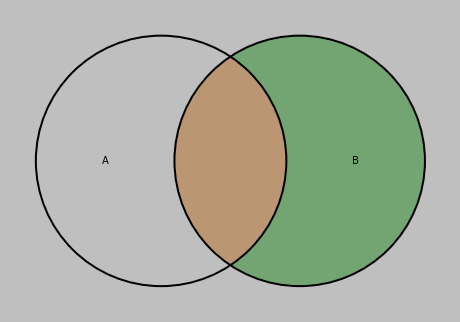

In [27]:
#Probabilidade Condicional P(A|B) - Probabilidade de A dado B
#Qual a probabilidade de A ocorrer dado que B ocorreu?

#Qual a probabilidade da soma de duas jogadas ser ≤ 6 dado que já saiu um 4?

#Definição: P(A|B) = P(A ∩ B)/P(B), se P(B) > 0

#Todos os eventos em que a soma é ≤ 6
A = set(list(filter(CheckLET6, Ω)))

#Função que retorna True se o primeiro for 4
def CheckET4(e):
    return e[0] == 4

B = set(list(filter(CheckET4, Ω)))
print("B: Jogadas cujo o primeiro elemento = 4: {0}".format(sorted(B)))

C = set(list(filter(CheckET4, A)))
print("A ∩ B: Jogadas cuja soma dos elementos é ≤ 6 e o primeiro elemento = 4: {0}\n".format(sorted(C)))

print("P(A|B) = P(A ∩ B)/P(B) = {0:.2f}%\n".format(P(C)[0]*100/P(B)[0]))

#Verificar se faz sentindo com o diagrama abaixo
fig = plt.figure(figsize=(8,8))
v = venn2(subsets=(2,2,1), set_labels = ('', '',''))
v.get_label_by_id('10').set_text('A')
v.get_patch_by_id('10').set_color((0.75, 0.75, 0.75))
v.get_label_by_id('01').set_text('B')
v.get_label_by_id('11').set_text('')
c = venn2_circles(subsets=(2, 2, 1))

fig.patch.set_facecolor((0.75, 0.75, 0.75))

In [28]:
#Independência de Variáveis

#Se A e B são independentes:
#P(A|B) = P(A)
#Ou seja, B não contribui com nenhuma informação acerca da probabilidade de ocorrer A

#Consequência:
#P(A ∩ B) = P(A)P(B)

#Achtung: Não confundir com conjuntos disjuntos!

#Exemplo: Qual a probabilidade de sair número um número maior que 3 dado que já saiu um número 4?

#Função que retorna True se o último for > 3
def CheckGT3(e):
    return e[1] > 3

A = set(list(filter(CheckGT3, Ω)))
print("A: Jogadas cujo o último elemento > 3: {0}\n".format(sorted(A)))
print("P(A) = {0:.2f}%\n".format(P(A)[0]))

B = set(list(filter(CheckET4, Ω)))
print("B: Jogadas cujo o primeiro elemento = 4: {0}".format(sorted(B)))

C = set(list(filter(CheckET4, A)))
print("A ∩ B: Jogadas cujo último elemento > 3 e o primeiro elemento = 4: {0}\n".format(sorted(C)))

print("P(A|B) = P(A ∩ B)/P(B) = {0:.2f}% = P(A)\n".format(P(C)[0]*100/P(B)[0]))

A: Jogadas cujo o último elemento > 3: [(1, 4), (1, 5), (1, 6), (2, 4), (2, 5), (2, 6), (3, 4), (3, 5), (3, 6), (4, 4), (4, 5), (4, 6), (5, 4), (5, 5), (5, 6), (6, 4), (6, 5), (6, 6)]

P(A) = 50.00%

B: Jogadas cujo o primeiro elemento = 4: [(4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6)]
A ∩ B: Jogadas cujo último elemento > 3 e o primeiro elemento = 4: [(4, 4), (4, 5), (4, 6)]

P(A|B) = P(A ∩ B)/P(B) = 50.00% = P(A)

